In [1]:
import math
import pandas as pd
import numpy as np 
import statistics
import matplotlib.pyplot as plt
#importing all the libraries that will be needed throughout the work

In [2]:
schools= pd.read_csv('schools.csv')
schools.head()
#importing the schools csv dataset that will be used to answer the questions 

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [3]:
#creating the threshold for getting the schools with best math score. Since the result for best math is 80% of 800 the threshold will be created based on this.
best_math_thres = 0.8*800

In [4]:
#creating a new variable to get the schools with the best math scores based on the predetermined threshold of 80% of 800
best_math_schools = schools[schools['average_math'] >= best_math_thres]
best_math_schools.head(10)

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0
68,"High School for Mathematics, Science, and Engi...",Manhattan,M812,683,610,596,92.6
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9


In [5]:
#arranging the best math score by just the school name and average math and in descending order.
best_math_schools = best_math_schools[['school_name', 'average_math']].sort_values(
    by='average_math', ascending = False)
print(best_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


In [6]:
#creating the total_SAT as variable from the sums of the total criteria for SAT scoring namely: Math, Reading and writing.
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

In [7]:
# creating a variable named top 10 schools based the the Total SAT column that was created before 
top_10_schools = schools.sort_values('total_SAT', ascending = False)
top_10_schools.head(15)

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4,2144
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0,2041
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7,2041
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8,2013
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1,1981
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9,1947
5,Bard High School Early College,Manhattan,M097,634,641,639,70.8,1914
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5,1896
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0,1889
68,"High School for Mathematics, Science, and Engi...",Manhattan,M812,683,610,596,92.6,1889


In [8]:
#using the dropna method to drop any missing values in the borough or Total SAT coulmn before procceding
schools = schools.dropna(subset=['borough', 'total_SAT'])

In [9]:
#calculating the standard deviation by the borough and total SAT scores. the .reset_index functionis to reassing it the the dataframe 
std_devs_totalsat_borough = schools.groupby('borough')['total_SAT'].std().reset_index()
std_devs_totalsat_borough.head()

#assinging thw calculated standard deviation to the selected variable name and sortig ot by the Total SAT scores in the asscending order.
largest_std_dev = round(std_devs_totalsat_borough.sort_values('total_SAT', ascending = False),2)
largest_std_dev.head(1)

,borough,total_SAT
2,Manhattan,230.29


In [10]:
average_SAT = round(schools['total_SAT'].mean(),2)
average_SAT

1275.91

In [11]:
std_SAT = round(schools['total_SAT'].std(),2)
std_SAT

194.91

In [41]:
borough_best_NYC = schools.groupby('borough').agg(
    num_schools=('school_name', 'count'),
    average_SAT=('total_SAT', 'mean'),
    std_SAT=('total_SAT', 'std')
).reset_index()

borough_best_NYC = borough_stats.sort_values(by='std_SAT', ascending=False).head(1)
borough_best_NYC

,borough,num_schools,average_SAT,std_SAT
2,Manhattan,89,1340.134831,230.29414


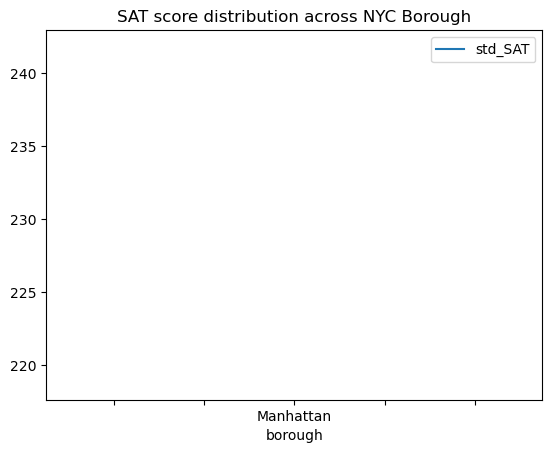

In [47]:
borough_best_NYC.plot(x = 'borough', y = 'std_SAT', kind = 'line', title = 'SAT score distribution across NYC Borough',lable = '' legend = True)
plt.show()

In [49]:
print(borough_best_NYC.columns)

Index(['borough', 'num_schools', 'average_SAT', 'std_SAT'], dtype='object')


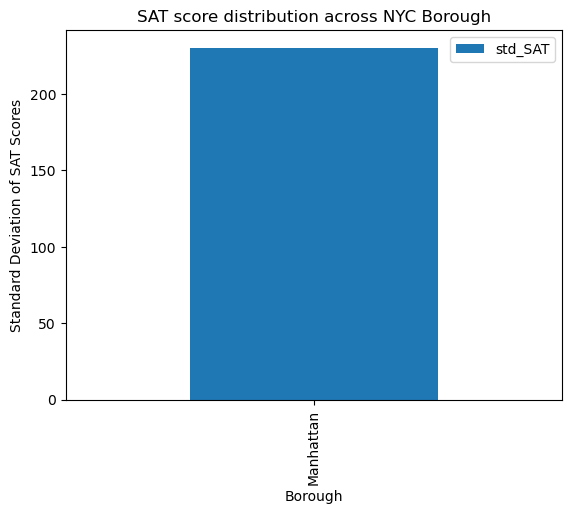

In [55]:
borough_best_NYC.plot(
    x='borough',  
    y='std_SAT',
    kind='bar',
    title='SAT score distribution across NYC Borough',
    legend=True
)
plt.xlabel('Borough')
plt.ylabel('Standard Deviation of SAT Scores')
plt.grid(False)
plt.show()